# About this project

## Abstract
This project analysis the geographical distribution of tourism establishments in South Tyrol, Italy.

Through visualisations, the analysis aims at identifying parts of the region with the highest density of tourism establishments across various dimensions, such as:

- Number of rooms
- Occupancy levels (in absolute terms and per 1,000 inhabitants)
- Average occupancy level by establishment
- Number of establishments (in absolute terms and per 1,000 inhabitants)

The analysis is carried out both at the granularity of GPS coordinates as well as at the municipal level.
    
## Data Sources

This project uses the following data sources

- **Tourism** data provided by the [Opendatahub API.](https://tourism.opendatahub.bz.it/swagger/index.html#/Accommodation/SingleAccommodationRoom)

- **Population** and **municipal boundaries** provided by the [Geocatalogue of South Tyrol.](http://geokatalog.buergernetz.bz.it/geokatalog/#!)
    - See the `README` at the root of this repo for detailed information on which data layers are used. 

# Analysis

## Environment

Preparing the environment

- Loading necessary `Python` libaries as well as custom functions

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# Importing custom functions
import sys
sys.path.append("../")
from src import utils
from src import config

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
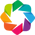

In [4]:
from IPython.display import Image
from typing import Tuple
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import geoviews as gv
import geopandas as gpd
import os
from bokeh.models import HoverTool
gv.extension('bokeh')
mpl.rcParams['figure.dpi'] = 300

In [5]:
# Hide depreciation warnings, e.g. ShapelyDeprecationWarning
import warnings
warnings.filterwarnings("ignore")

## Data

This section prepares the data before visualising it.

In [6]:
# Tourism data aggregated at the municipality level
df_municipality = utils.load_municipality_data()
df_municipality.head(2)

NAME_D        NAME_I  nr_establishments  total_occupancy  total_nr_rooms  \
0    Abtei         Badia                383          15155.0          3702.0   
1  Ahrntal  Valle Aurina                209           9156.0          2361.0   

   avg_occupancy  share_1_rating  share_2_rating  share_3_rating  \
0      42.690141        5.221932       52.219321       29.503916   
1      45.103448       11.004785       34.928230       42.583732   

   share_3s_rating  ...  share_4s_rating  share_5_rating  share_stars  \
0         4.438642  ...         1.305483        1.566580    35.509138   
1         0.956938  ...         0.956938        2.870813    42.583732   

   share_suns  share_flowers  BW_WOHNBEV  \
0   49.347258      13.577023      3505.0   
1   24.401914      31.578947      6022.0   

                                            geometry  \
0  POLYGON Z ((11.95136 46.61447 0.00000, 11.9502...   
1  POLYGON Z ((12.05950 47.05853 0.00000, 12.0593...   

  nr_establishments_per_thousand_pop  total_occupancy_per_thousand_pop  \
0                         109.272468                       4323.823110   
1                          34.706078                       1520.425108   

   total_nr_rooms_per_thousand_pop  
0                      1056.205421  
1                       392.062438  

[2 rows x 21 columns]

In [7]:
# Tourism establishments at the GPS level + kernel density estimation + basemap of South Tyrol
d_establishments = utils.load_density_data()
d_establishments.keys()

dict_keys(['establishments', 'basemap', 'y_grid', 'x_grid', 'z_grid_masked'])

In [8]:
# Parsed API calls: properties of each tourism establishment
df_tourism = pd.read_csv(config.PREPARED_ACCOMM_FILE)
df_tourism.head(2)

Name                   City AccoCategoryId  \
0  Apartments Ciasa Soratru - Bauernhof  St. Vigil in Enneberg       3flowers   
1               Apartments Ciasa Stoffl  St. Vigil in Enneberg          3suns   

   AccoRoomInfo  HasApartment  IsGastronomy                 LocationInfo  \
0           3.0          True         False  Dolomitenregion San Vigilio   
1           1.0          True         False  Dolomitenregion San Vigilio   

   Altitude  Latitude  Longitude  ... AccoCategoryRating_3S  \
0    1281.0   46.7194    11.9181  ...                     0   
1    1201.0   46.7049    11.9241  ...                     0   

  AccoCategoryRating_4 AccoCategoryRating_4S AccoCategoryRating_5  \
0                    0                     0                    0   
1                    0                     0                    0   

                  geometry  index_right    NAME_D   NAME_I  TotalRooms  \
0  POINT (11.9181 46.7194)         39.0  Enneberg  Marebbe         NaN   
1  POINT (11.9241 46.7049)         39.0  Enneberg  Marebbe         1.0   

   MaxOccupancy  
0           NaN  
1           5.0  

[2 rows x 30 columns]

## EDA

This section performs Exploratory Data Anlysis (EDA) on various properties of tourism establishments

### Categories

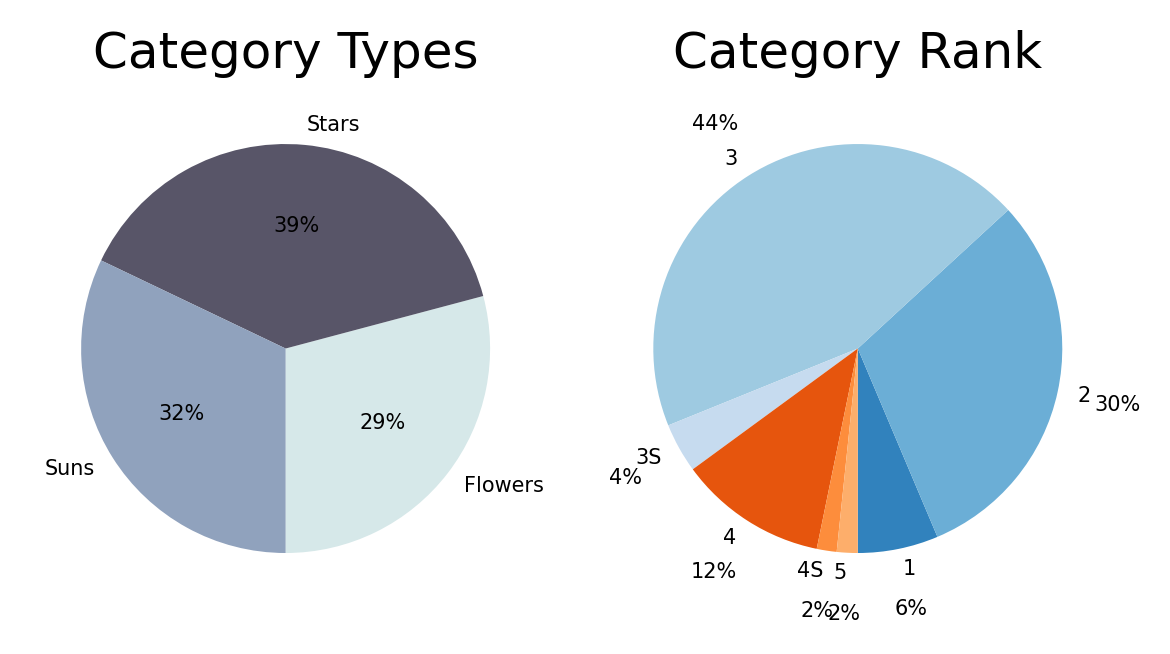

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(4, 4))

df_categories = (
    df_tourism
    .groupby(["AccoCategoryRating", "AccoCategoryType"])
    .agg(Count=("Id", "count"))
    .reset_index()
)
colors = [(214, 232, 233), (88, 85, 104), (144, 162, 189)]
colors = [[i/255 for i in j] for j in colors]
ax = (
    df_categories
    .groupby("AccoCategoryType")
    .Count.sum()
    .sort_index()
    .plot(kind="pie", autopct='%1.0f%%', startangle=270, fontsize=5, colors=colors, ax=axes[0])
)
ax.set_ylabel("");
ax.set_title("Category Types");

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(df_categories.AccoCategoryRating.nunique()))
ax = (
    df_categories
    .groupby("AccoCategoryRating")
    .Count.sum()
    .plot(
        kind="pie", startangle=270, fontsize=5, ax=axes[1], colors=colors, 
        pctdistance=1.3, autopct='%1.0f%%',
    )
)
ax.set_ylabel("");
ax.set_title("Category Rank")
plt.tight_layout()

### Altitude vs Category type

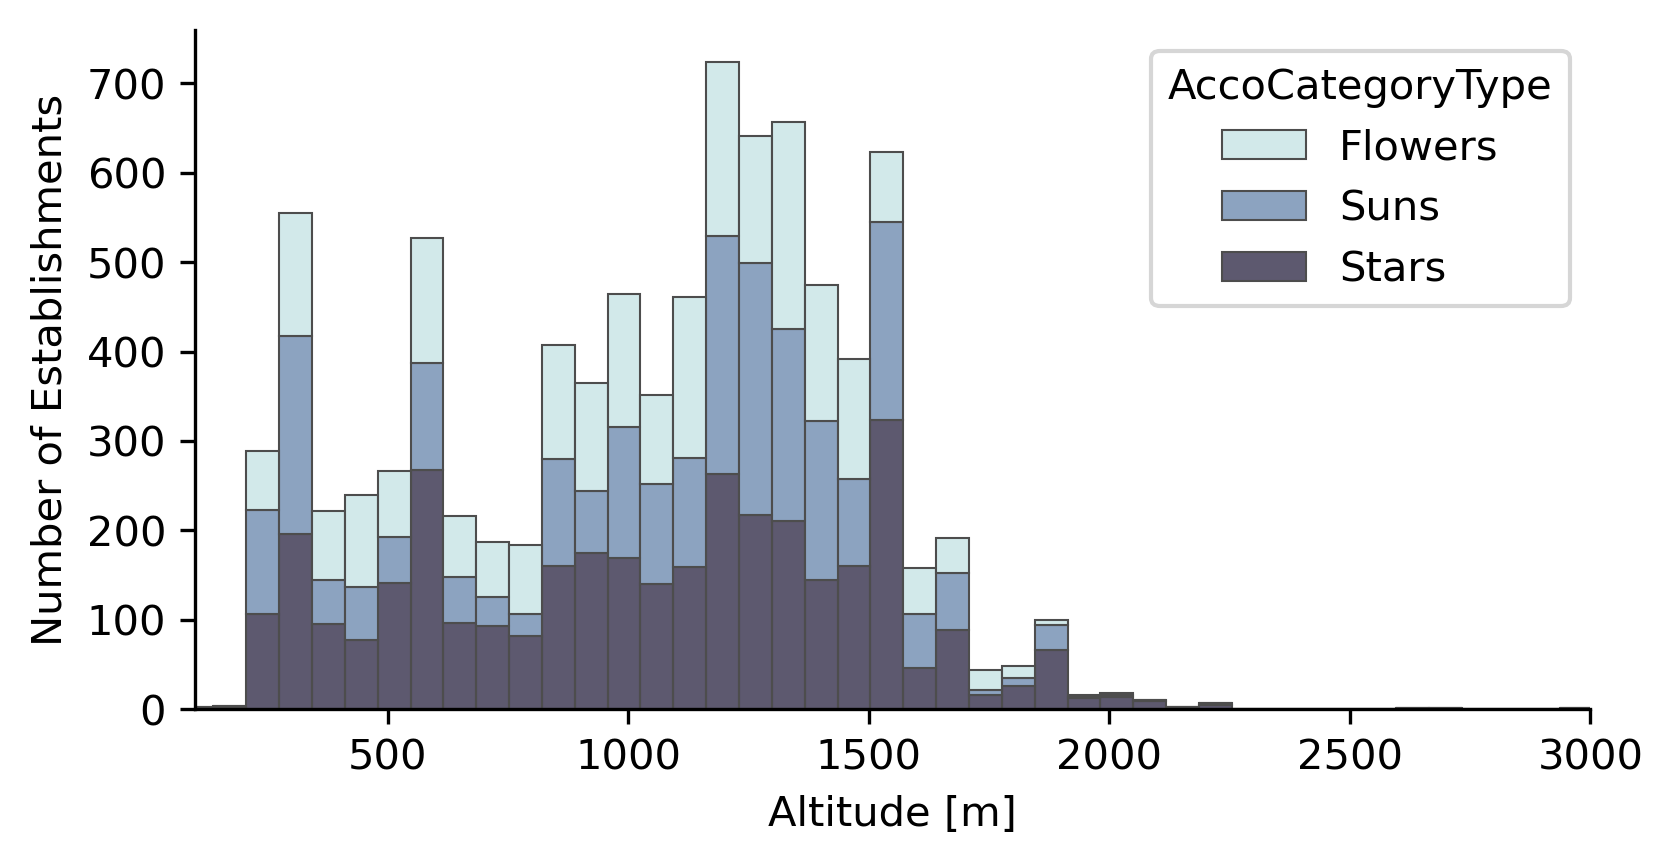

In [10]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.despine(fig)
sns.histplot(
    df_tourism.query("Altitude > 0"),
    x="Altitude", 
    hue="AccoCategoryType",
    multiple="stack",
    palette="ch:start=.2,rot=-.3",
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
)
ax.set_xlim(100, 3_000)
ax.set_ylabel("Number of Establishments")
ax.set_xlabel("Altitude [m]");

## Visualisations

This section creats the `geoviews` plots.

### At the level of municipalities

This analysis summarises tourism information **at the municipal level** by means of aggregation.

Specifically, the following metrics are available:

- Number of tourism establishments
- Number of tourism establishments per 1,000 inhabitants
- Total occupancy
- Total occupancy per 1,000 inhabitants
- Total number of rooms
- Mean occupancy per tourism establishment
- Share of
    - establishments by rating (1, 2, ..., 5)
    - establishments by category (flowers, stars, suns)

In [11]:
kpi_to_visualise = "Number of Tourism Establishments"

In [ ]:
fig = utils.define_municipality_map(
    data=df_municipality, 
    color_col=config.VARIABLES_INV[kpi_to_visualise], 
    title=kpi_to_visualise, 
    clabel=kpi_to_visualise
)
fig

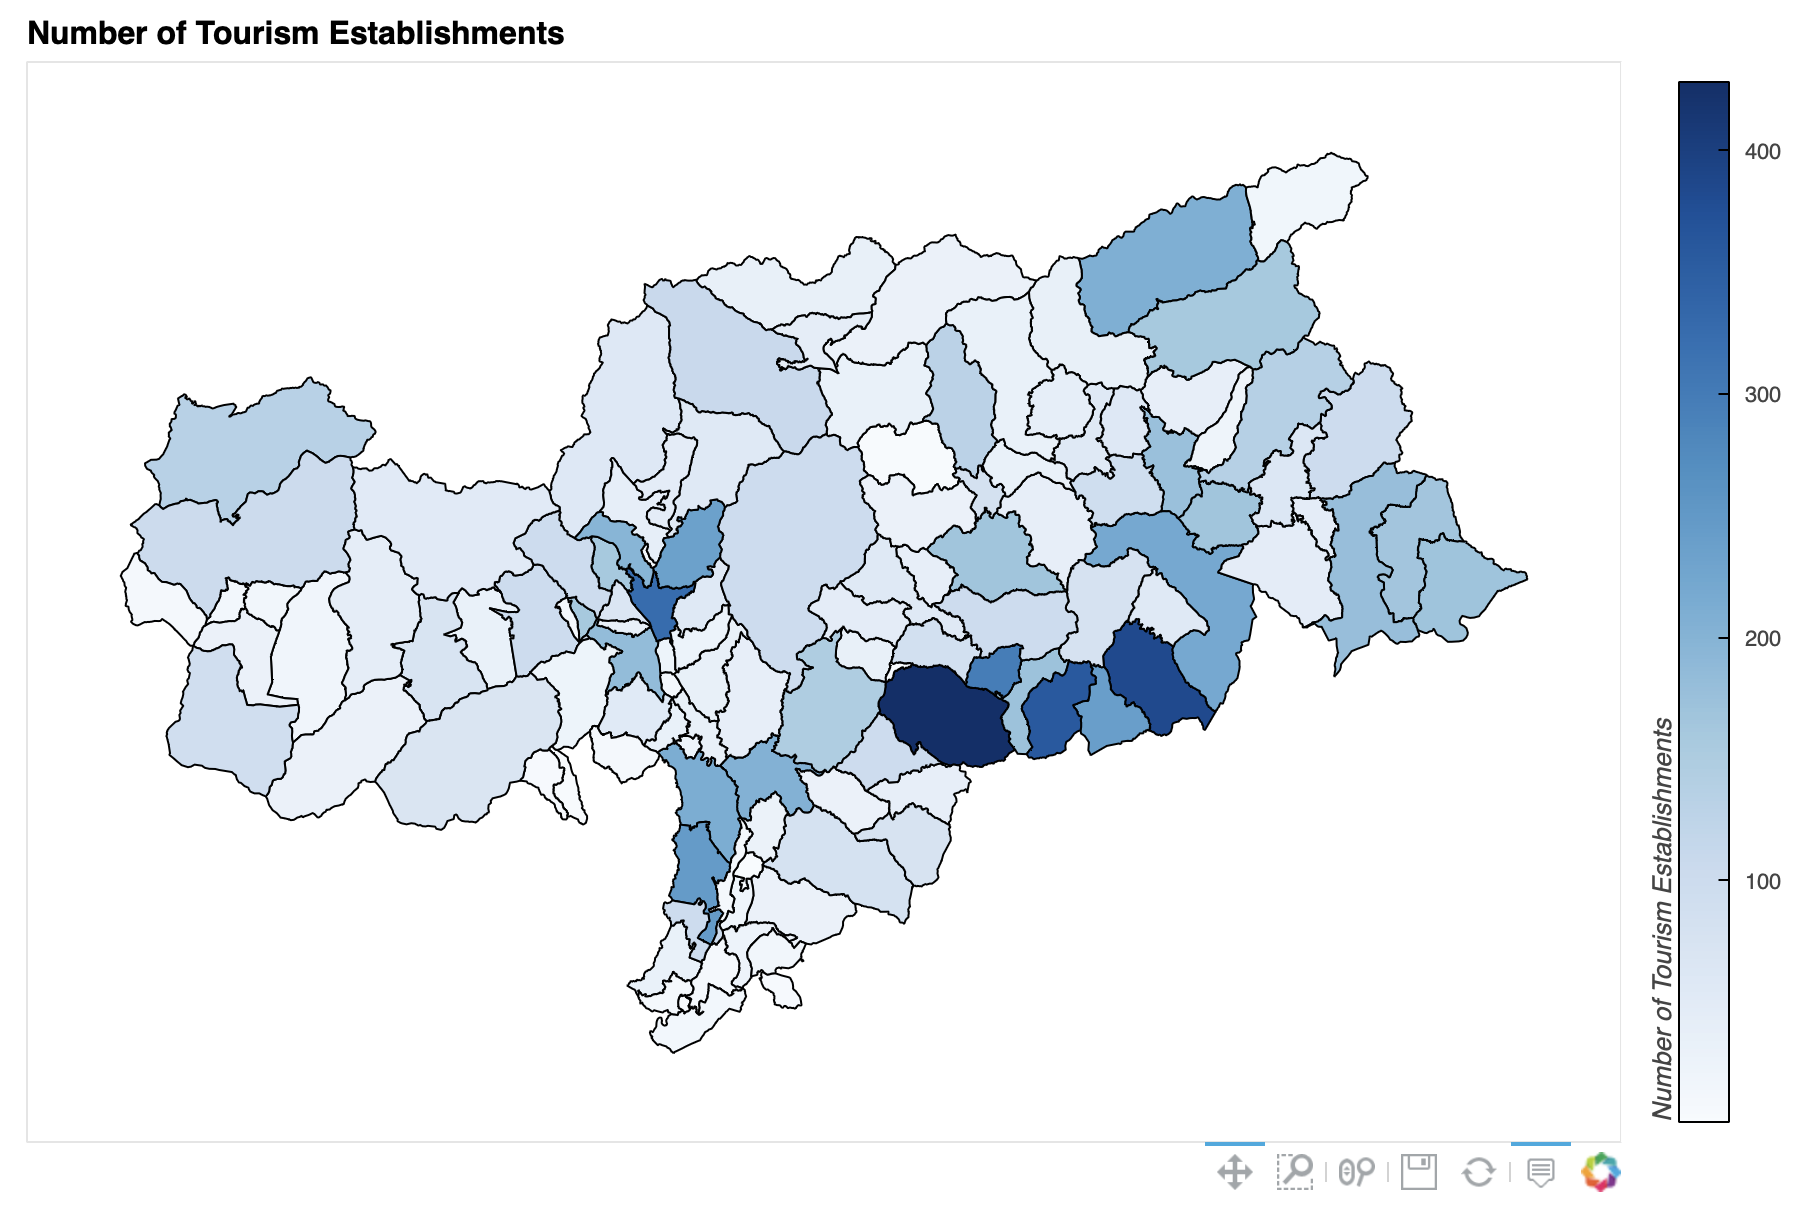

In [16]:
# For Github: visualise a static version of the above geoviews figure
filename = "../plots/municipality"
renderer = gv.renderer('matplotlib')
# renderer.save(fig, filename)
Image(filename=filename + ".png")

### At the level of individual establishments

This analysis performs a kernel density estimation over GPS coordinates of individual tourism to highlight regions in South Tyrol with the highest conglomeration of tourism establishments.

In [ ]:
fig = utils.define_density_map(**d_establishments)
fig

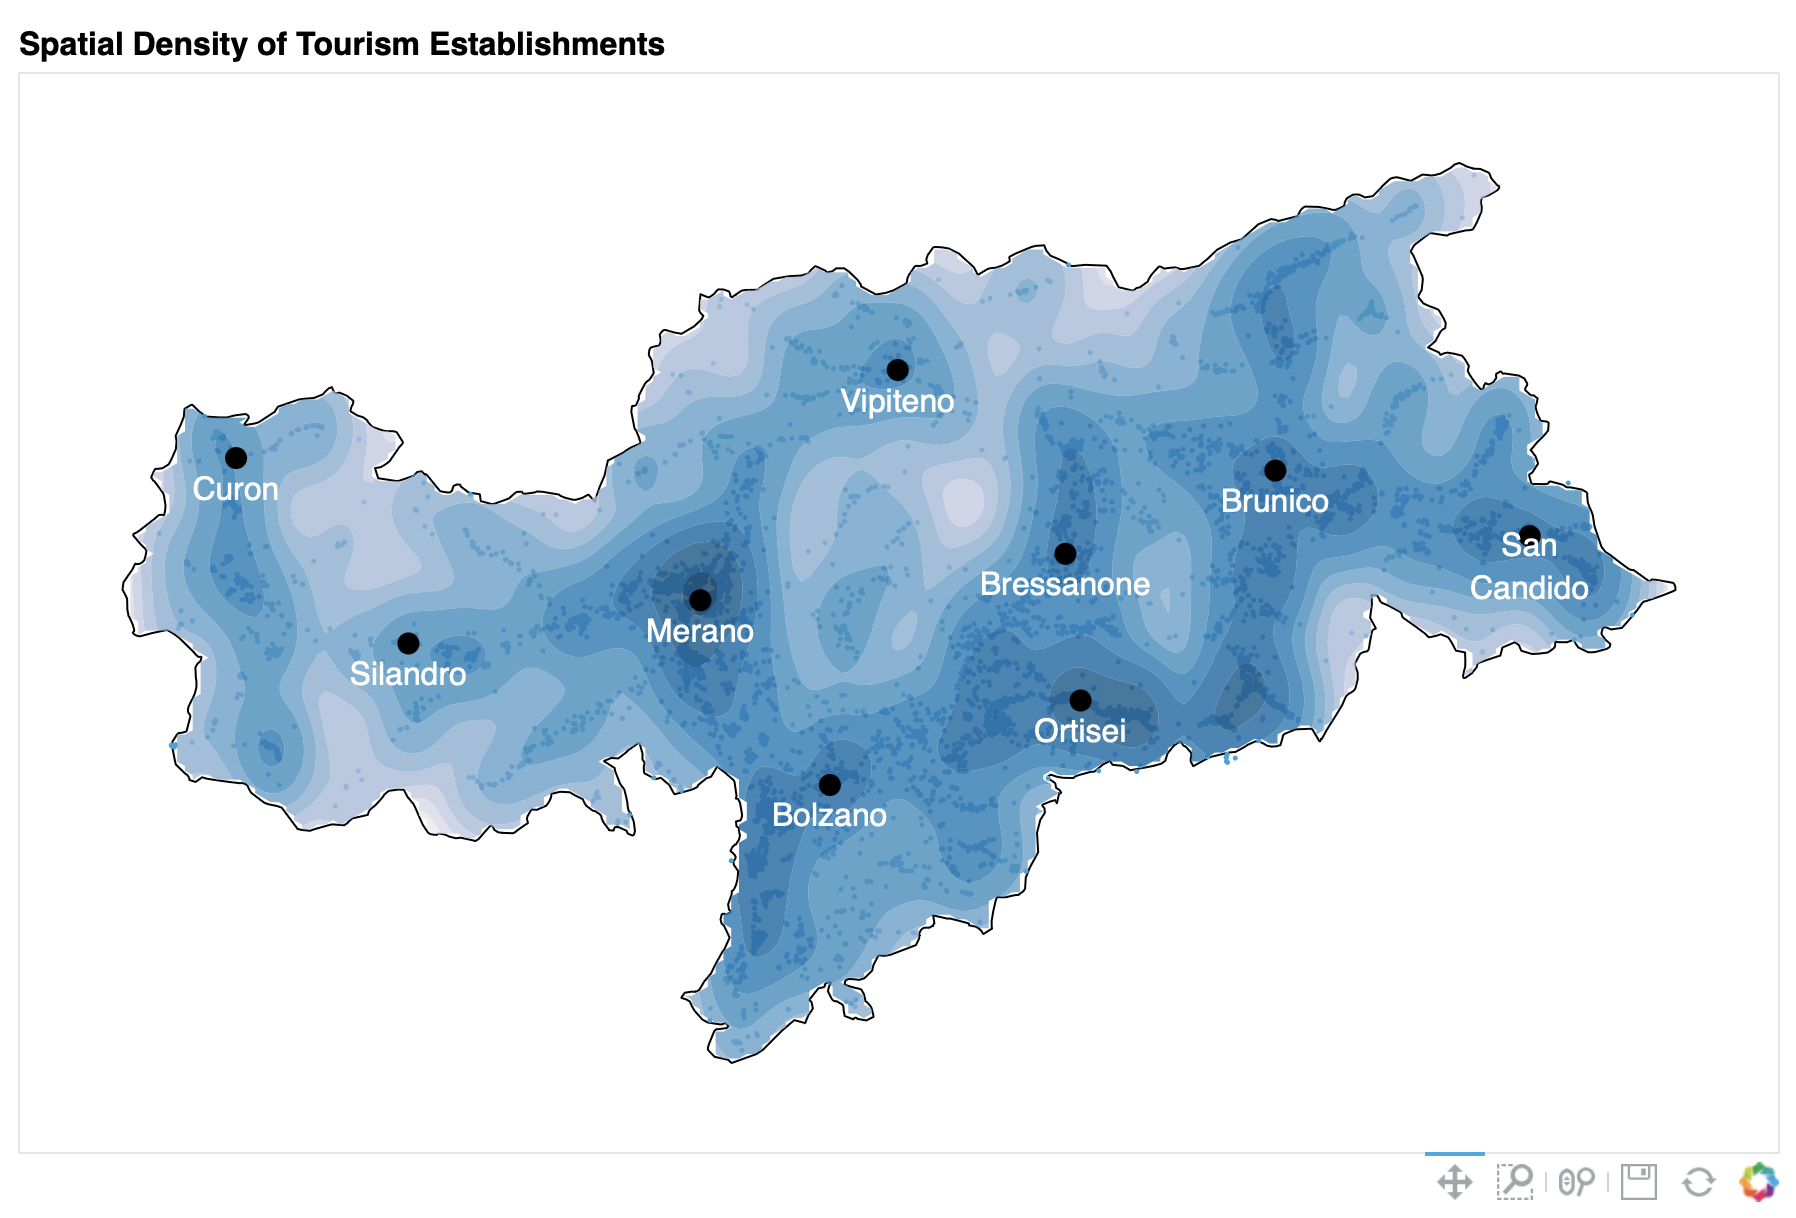

In [15]:
# For Github: visualise a static version of the above geoviews figure
filename = "../plots/spatial_density"
renderer = gv.renderer('matplotlib')
# renderer.save(fig, filename)
Image(filename=filename + ".png")